In [55]:
import requests
import pandas as pd 
from bs4 import BeautifulSoup
import string
import spacy
import re
import numpy as np

In [56]:
url="https://insights.blackcoffer.com/how-is-login-logout-time-tracking-for-employees-in-office-done-by-ai/"

In [57]:
headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:60.0) Gecko/20100101 Firefox/60.0"}

page = requests.get(url, headers=headers)

soup=BeautifulSoup(page.content, 'html.parser')

In [58]:
title=soup.find('h1',class_="entry-title")
title=title.text.replace('\n'," ")
title

'How is Login Logout Time Tracking for Employees in Office done by AI?'

In [59]:
content=soup.findAll(attrs={'class':'td-post-content'})
content=content[0].text.replace('\n'," ")
content

' When people hear AI they often think about sentient robots and magic boxes. AI today is much more mundane and simple—but that doesn’t mean it’s not powerful. Another misconception is that high-profile research projects can be applied directly to any business situation. AI done right can create an extreme return on investments (ROIs)—for instance through automation or precise prediction. But it does take thought, time, and proper implementation. We have seen that success and value generated by AI projects are increased when there is a grounded understanding and expectation of what the technology can deliver from the C-suite down. “Artificial Intelligence (AI) is a science and a set of computational technologies that are inspired by—but typically operate quite differently from—the ways people use their nervous systems and bodies to sense, learn, reason and take action.”3 Lately there has been a big rise in the day-to-day use of machines powered by AI. These machines are wired using cro

In [60]:
content = content.translate(str.maketrans('', '', string.punctuation)) 
content

' When people hear AI they often think about sentient robots and magic boxes AI today is much more mundane and simple—but that doesn’t mean it’s not powerful Another misconception is that highprofile research projects can be applied directly to any business situation AI done right can create an extreme return on investments ROIs—for instance through automation or precise prediction But it does take thought time and proper implementation We have seen that success and value generated by AI projects are increased when there is a grounded understanding and expectation of what the technology can deliver from the Csuite down “Artificial Intelligence AI is a science and a set of computational technologies that are inspired by—but typically operate quite differently from—the ways people use their nervous systems and bodies to sense learn reason and take action”3 Lately there has been a big rise in the daytoday use of machines powered by AI These machines are wired using crossdisciplinary appro

In [61]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(content)

In [62]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jayes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
my_stop_words = stopwords.words('english')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]

In [64]:
df = pd.read_csv(r'C:\Users\jayes\Downloads\LoughranMcDonald_MasterDictionary_2020.csv')
df.head()

,Word,Seq_num,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Complexity,Syllables,Source
0,AARDVARK,1,312,1.422050e-08,1.335201e-08,3.700747e-06,96,0,0,0,0,0,0,0,0,2,12of12inf
1,AARDVARKS,2,3,1.367356e-10,8.882163e-12,9.362849e-09,1,0,0,0,0,0,0,0,0,2,12of12inf
2,ABACI,3,9,4.102067e-10,1.200533e-10,5.359747e-08,7,0,0,0,0,0,0,0,0,3,12of12inf
3,ABACK,4,15,6.836779e-10,4.080549e-10,1.406914e-07,14,0,0,0,0,0,0,0,0,2,12of12inf
4,ABACUS,5,8009,3.650384e-07,3.798698e-07,3.523914e-05,1058,0,0,0,0,0,0,0,0,3,12of12inf


In [65]:
df.shape

(86531, 17)

# positive_words

In [66]:
positive_words = df["Positive"]

In [67]:
pos_words = np.where(positive_words>0 , df["Word"] , 0)
pos_words

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [68]:
total_pos = []
for i in pos_words:
    if i!=0:
        total_pos.append(i)

In [69]:
total_pos

['ABLE',
 'ABUNDANCE',
 'ABUNDANT',
 'ACCLAIMED',
 'ACCOMPLISH',
 'ACCOMPLISHED',
 'ACCOMPLISHES',
 'ACCOMPLISHING',
 'ACCOMPLISHMENT',
 'ACCOMPLISHMENTS',
 'ACHIEVE',
 'ACHIEVED',
 'ACHIEVEMENT',
 'ACHIEVEMENTS',
 'ACHIEVES',
 'ACHIEVING',
 'ADEQUATELY',
 'ADVANCEMENT',
 'ADVANCEMENTS',
 'ADVANCES',
 'ADVANCING',
 'ADVANTAGE',
 'ADVANTAGED',
 'ADVANTAGEOUS',
 'ADVANTAGEOUSLY',
 'ADVANTAGES',
 'ALLIANCE',
 'ALLIANCES',
 'ASSURE',
 'ASSURED',
 'ASSURES',
 'ASSURING',
 'ATTAIN',
 'ATTAINED',
 'ATTAINING',
 'ATTAINMENT',
 'ATTAINMENTS',
 'ATTAINS',
 'ATTRACTIVE',
 'ATTRACTIVENESS',
 'BEAUTIFUL',
 'BEAUTIFULLY',
 'BENEFICIALLY',
 'BENEFITED',
 'BENEFITING',
 'BENEFITTED',
 'BENEFITTING',
 'BEST',
 'BETTER',
 'BOLSTERED',
 'BOLSTERING',
 'BOLSTERS',
 'BOOM',
 'BOOMING',
 'BOOST',
 'BOOSTED',
 'BREAKTHROUGH',
 'BREAKTHROUGHS',
 'BRILLIANT',
 'CHARITABLE',
 'COLLABORATE',
 'COLLABORATED',
 'COLLABORATES',
 'COLLABORATING',
 'COLLABORATION',
 'COLLABORATIONS',
 'COLLABORATIVE',
 'COLLABORATOR'

In [70]:
len(total_pos)

347

In [71]:
pos_tokens = [token.lower() for token in total_pos]
pos_tokens

['able',
 'abundance',
 'abundant',
 'acclaimed',
 'accomplish',
 'accomplished',
 'accomplishes',
 'accomplishing',
 'accomplishment',
 'accomplishments',
 'achieve',
 'achieved',
 'achievement',
 'achievements',
 'achieves',
 'achieving',
 'adequately',
 'advancement',
 'advancements',
 'advances',
 'advancing',
 'advantage',
 'advantaged',
 'advantageous',
 'advantageously',
 'advantages',
 'alliance',
 'alliances',
 'assure',
 'assured',
 'assures',
 'assuring',
 'attain',
 'attained',
 'attaining',
 'attainment',
 'attainments',
 'attains',
 'attractive',
 'attractiveness',
 'beautiful',
 'beautifully',
 'beneficially',
 'benefited',
 'benefiting',
 'benefitted',
 'benefitting',
 'best',
 'better',
 'bolstered',
 'bolstering',
 'bolsters',
 'boom',
 'booming',
 'boost',
 'boosted',
 'breakthrough',
 'breakthroughs',
 'brilliant',
 'charitable',
 'collaborate',
 'collaborated',
 'collaborates',
 'collaborating',
 'collaboration',
 'collaborations',
 'collaborative',
 'collaborator'

In [72]:
total_positive_words = []
for w in my_stop_words:
    if w  in pos_tokens:
        total_positive_words.append(w)
        

In [73]:
total_positive_words

[]

# negative_words

In [74]:
negative_words = df["Negative"]

In [75]:
neg_words = np.where(negative_words>0 , df["Word"] , 0)
neg_words

array([0, 0, 0, ..., 0, 0, 0], dtype=object)

In [76]:
total_neg = []
for i in neg_words:
    if i!=0:
        total_neg.append(i)

In [77]:
total_neg

['ABANDON',
 'ABANDONED',
 'ABANDONING',
 'ABANDONMENT',
 'ABANDONMENTS',
 'ABANDONS',
 'ABDICATED',
 'ABDICATES',
 'ABDICATING',
 'ABDICATION',
 'ABDICATIONS',
 'ABERRANT',
 'ABERRATION',
 'ABERRATIONAL',
 'ABERRATIONS',
 'ABETTING',
 'ABNORMAL',
 'ABNORMALITIES',
 'ABNORMALITY',
 'ABNORMALLY',
 'ABOLISH',
 'ABOLISHED',
 'ABOLISHES',
 'ABOLISHING',
 'ABROGATE',
 'ABROGATED',
 'ABROGATES',
 'ABROGATING',
 'ABROGATION',
 'ABROGATIONS',
 'ABRUPT',
 'ABRUPTLY',
 'ABRUPTNESS',
 'ABSENCE',
 'ABSENCES',
 'ABSENTEEISM',
 'ABUSE',
 'ABUSED',
 'ABUSES',
 'ABUSING',
 'ABUSIVE',
 'ABUSIVELY',
 'ABUSIVENESS',
 'ACCIDENT',
 'ACCIDENTAL',
 'ACCIDENTALLY',
 'ACCIDENTS',
 'ACCUSATION',
 'ACCUSATIONS',
 'ACCUSE',
 'ACCUSED',
 'ACCUSES',
 'ACCUSING',
 'ACQUIESCE',
 'ACQUIESCED',
 'ACQUIESCES',
 'ACQUIESCING',
 'ACQUIT',
 'ACQUITS',
 'ACQUITTAL',
 'ACQUITTALS',
 'ACQUITTED',
 'ACQUITTING',
 'ADULTERATE',
 'ADULTERATED',
 'ADULTERATING',
 'ADULTERATION',
 'ADULTERATIONS',
 'ADVERSARIAL',
 'ADVERSARIES',
 

In [78]:
len(total_neg)

2345

In [79]:
neg_tokens = [token.lower() for token in total_neg]
neg_tokens

['abandon',
 'abandoned',
 'abandoning',
 'abandonment',
 'abandonments',
 'abandons',
 'abdicated',
 'abdicates',
 'abdicating',
 'abdication',
 'abdications',
 'aberrant',
 'aberration',
 'aberrational',
 'aberrations',
 'abetting',
 'abnormal',
 'abnormalities',
 'abnormality',
 'abnormally',
 'abolish',
 'abolished',
 'abolishes',
 'abolishing',
 'abrogate',
 'abrogated',
 'abrogates',
 'abrogating',
 'abrogation',
 'abrogations',
 'abrupt',
 'abruptly',
 'abruptness',
 'absence',
 'absences',
 'absenteeism',
 'abuse',
 'abused',
 'abuses',
 'abusing',
 'abusive',
 'abusively',
 'abusiveness',
 'accident',
 'accidental',
 'accidentally',
 'accidents',
 'accusation',
 'accusations',
 'accuse',
 'accused',
 'accuses',
 'accusing',
 'acquiesce',
 'acquiesced',
 'acquiesces',
 'acquiescing',
 'acquit',
 'acquits',
 'acquittal',
 'acquittals',
 'acquitted',
 'acquitting',
 'adulterate',
 'adulterated',
 'adulterating',
 'adulteration',
 'adulterations',
 'adversarial',
 'adversaries',
 

In [80]:
total_negative_count = " ".join ([w for w in my_stop_words if w in neg_tokens])
total_negative_count=total_negative_count.split(" ")
total_negative_count

['against']

In [81]:
data=[[url,title,content,len(total_pos),len(total_neg)]]


In [82]:
data=pd.DataFrame(data,columns=["url","title","content","Positive_Score","Negative_Score"])
data

,url,title,content,Positive_Score,Negative_Score
0,https://insights.blackcoffer.com/how-is-login-...,How is Login Logout Time Tracking for Employee...,When people hear AI they often think about se...,347,2345


In [83]:
from textblob import TextBlob

def sentiment_analysis(data):
    sentiment = TextBlob(data["content"]).sentiment
    return pd.Series([sentiment.polarity,sentiment.subjectivity ])

data[["polarity", "subjectivity"]] = data.apply(sentiment_analysis, axis=1)

data

,url,title,content,Positive_Score,Negative_Score,polarity,subjectivity
0,https://insights.blackcoffer.com/how-is-login-...,How is Login Logout Time Tracking for Employee...,When people hear AI they often think about se...,347,2345,0.14304,0.478514


# Average sentence length

In [84]:
AVG_SENTENCE_LENGTH = len(content.replace(' ',''))/len(re.split(r'[?!.]', content))
print('Word average =', AVG_SENTENCE_LENGTH)

Word average = 3673.0


In [85]:
pip install textstat

Note: you may need to restart the kernel to use updated packages.


In [86]:
import textstat
FOG_INDEX=(textstat.gunning_fog(content))
print(FOG_INDEX)

289.41


In [87]:
AVG_NUMBER_OF_WORDS_PER_SENTENCE = [len(l.split()) for l in re.split(r'[?!.]', content) if l.strip()]
AVG_NUMBER_OF_WORDS_PER_SENTENCE=sum(AVG_NUMBER_OF_WORDS_PER_SENTENCE)/len(AVG_NUMBER_OF_WORDS_PER_SENTENCE)
AVG_NUMBER_OF_WORDS_PER_SENTENCE

712.0

In [88]:
Average_Word_Length=len(content.replace(' ',''))/len(content.split())
print(Average_Word_Length)

5.158707865168539


In [89]:
Word_Count=len(content)
print(Word_Count)

4386


In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(9,15))
    plt.imshow(wordcloud) 
    plt.axis("off");

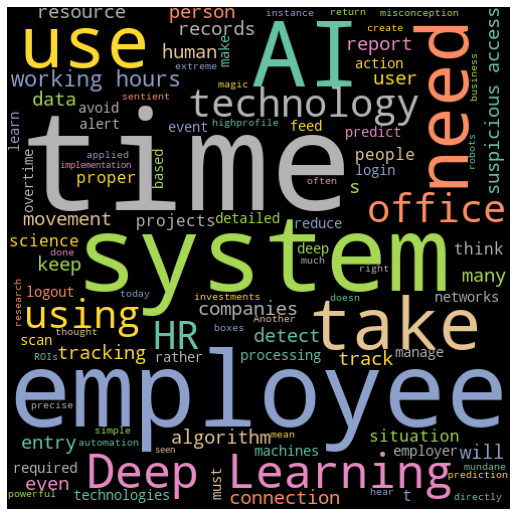

In [91]:
stopwords = STOPWORDS
wordcloud = WordCloud(width = 500, height = 500, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(content)
# Plot
plot_cloud(wordcloud)

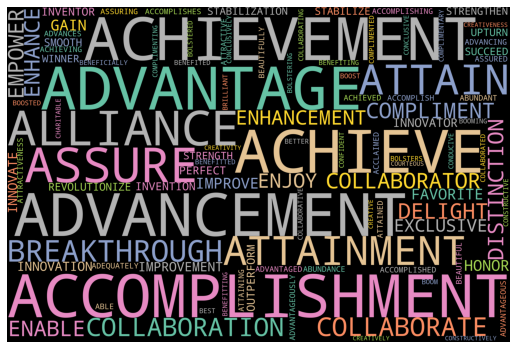

In [92]:
pos_review = " ".join ([w for w in total_pos if w in pos_words])
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(pos_review)
#Plot
plot_cloud(wordcloud)

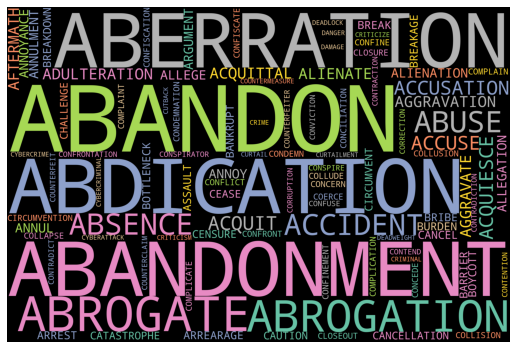

In [93]:
neg_review = " ".join ([w for w in total_neg if w in neg_words])

wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(neg_review)
#Plot
plot_cloud(wordcloud)

In [94]:
def syllable_count(word):
    count = 0
    vowels = "AEIOUYaeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)): 
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
            if word.endswith("es"or "ed"):
                count -= 1
    if count == 0:
        count += 1
    return count



COMPLEX_WORDS=syllable_count(content)
print(COMPLEX_WORDS)

1279


# Percentage of Complex words

In [95]:
pcw=(COMPLEX_WORDS/Word_Count)*100
print(pcw)

29.1609667122663


# Personal Pronouns

In [96]:
def ProperNounExtractor(text):
    count = 0
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        tagged = nltk.pos_tag(words)
        for (word, tag) in tagged:
            if tag == 'PRP': # If the word is a proper noun
                count = count + 1 
        
    return(count)         
                


Personal_Pronouns=ProperNounExtractor(content)  

# Average Word Length

In [97]:
Average_Word_Length=len(content.replace(' ',''))/len(content.split())
print(Average_Word_Length)

5.158707865168539


# SYLLABLE PER WORD

In [98]:
word=content.replace(' ','')
syllable_count=0
for w in word:
      if(w=='a' or w=='e' or w=='i' or w=='o' or w=='y' or w=='u' or w=='A' or w=='E' or w=='I' or w=='O' or w=='U' or w=='Y'):
            syllable_count=syllable_count+1

SYLLABLE_PER_WORD = syllable_count/len(content.split())
print("The AVG number of syllables in the word is: " ,SYLLABLE_PER_WORD )

The AVG number of syllables in the word is:  2.109550561797753


In [99]:
data["AVG_SENTENCE_LENGTH"] = AVG_SENTENCE_LENGTH
data["FOG_INDEX"] =FOG_INDEX
data["AVG_NUMBER_OF_WORDS_PER_SENTENCE"] = AVG_NUMBER_OF_WORDS_PER_SENTENCE
data["Average_Word_Length"] = Average_Word_Length
data["Word_Count"] = Word_Count
data["COMPLEX_WORDS"] = COMPLEX_WORDS
data["Percentage of Complex words"] = pcw
data["SYLLABLE_PER_WORD"] =SYLLABLE_PER_WORD

In [100]:
data 

,url,title,content,Positive_Score,Negative_Score,polarity,subjectivity,AVG_SENTENCE_LENGTH,FOG_INDEX,AVG_NUMBER_OF_WORDS_PER_SENTENCE,Average_Word_Length,Word_Count,COMPLEX_WORDS,Percentage of Complex words,SYLLABLE_PER_WORD
0,https://insights.blackcoffer.com/how-is-login-...,How is Login Logout Time Tracking for Employee...,When people hear AI they often think about se...,347,2345,0.14304,0.478514,3673.0,289.41,712.0,5.158708,4386,1279,29.160967,2.109551


In [101]:
final_data = data.to_csv("data.csv")

In [102]:
all_urls = pd.read_csv(r"C:\Users\jayes\Downloads\Input.xlsx - Sheet1.csv")
all_urls.head()

,URL_ID,URL
0,1,https://insights.blackcoffer.com/how-is-login-...
1,2,https://insights.blackcoffer.com/how-does-ai-h...
2,3,https://insights.blackcoffer.com/ai-and-its-im...
3,4,https://insights.blackcoffer.com/how-do-deep-l...
4,5,https://insights.blackcoffer.com/how-artificia...


In [103]:
url_link = []
for i in all_urls["URL"]:
    url_link.append(i)

In [104]:
urls ="https://insights.blackcoffer.com/how-does-ai-help-to-monitor-retail-shelf-watches/"
header = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:60.0) Gecko/20100101 Firefox/60.0"}

page = requests.get(urls, headers=header)

soup=BeautifulSoup(page.content, 'html.parser')

title=soup.find('h1',class_="entry-title")
title=title.text.replace('\n'," ")
title


content=soup.findAll(attrs={'class':'td-post-content'})
content=content[0].text.replace('\n'," ")
content

content = content.translate(str.maketrans('', '', string.punctuation)) 
content

from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(content)

import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')


my_stop_words = stopwords.words('english')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]

df = pd.read_csv(r'C:\Users\jayes\Downloads\LoughranMcDonald_MasterDictionary_2020.csv')

positive_words = df["Positive"]

pos_words = np.where(positive_words>0 , df["Word"] , 0)

total_pos = []
for i in pos_words:
    if i!=0:
        total_pos.append(i)
        
        
negative_words = df["Negative"]
neg_words = np.where(negative_words>0 , df["Word"] , 0)


total_neg = []
for i in neg_words:
    if i!=0:
        total_neg.append(i)
        
total_negative_count = " ".join ([w for w in my_stop_words if w in neg_tokens])
total_negative_count=total_negative_count.split(" ")

data1=[[url,title,content,len(total_pos),len(total_neg)]]

data1=pd.DataFrame(data,columns=["url","title","content","Positive_Score","Negative_Score"])


from textblob import TextBlob

def sentiment_analysis(data):
    sentiment = TextBlob(data["content"]).sentiment
    return pd.Series([sentiment.polarity,sentiment.subjectivity ])

data1[["polarity", "subjectivity"]] = data1.apply(sentiment_analysis, axis=1)
data1

AVG_SENTENCE_LENGTH = len(content.replace(' ',''))/len(re.split(r'[?!.]', content))

import textstat
FOG_INDEX=(textstat.gunning_fog(content))

Average_Word_Length=len(content.replace(' ',''))/len(content.split())

Word_Count=len(content)

def syllable_count(word):
    count = 0
    vowels = "AEIOUYaeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)): 
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
            if word.endswith("es"or "ed"):
                count -= 1
    if count == 0:
        count += 1
    return count



COMPLEX_WORDS=syllable_count(content)

pcw=(COMPLEX_WORDS/Word_Count)*100

def ProperNounExtractor(text):
    count = 0
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        tagged = nltk.pos_tag(words)
        for (word, tag) in tagged:
            if tag == 'PRP': # If the word is a proper noun
                count = count + 1 
        
    return(count)         
                


Personal_Pronouns=ProperNounExtractor(content)  



Average_Word_Length=len(content.replace(' ',''))/len(content.split())

word=content.replace(' ','')
syllable_count=0
for w in word:
      if(w=='a' or w=='e' or w=='i' or w=='o' or w=='y' or w=='u' or w=='A' or w=='E' or w=='I' or w=='O' or w=='U' or w=='Y'):
            syllable_count=syllable_count+1
Average_Word_Length = syllable_count/len(content.split())




data1["AVG_SENTENCE_LENGTH"] = AVG_SENTENCE_LENGTH
data1["FOG_INDEX"] =FOG_INDEX
data1["AVG_NUMBER_OF_WORDS_PER_SENTENCE"] = AVG_NUMBER_OF_WORDS_PER_SENTENCE
data1["Average_Word_Length"] = Average_Word_Length
data1["Word_Count"] = Word_Count
data1["COMPLEX_WORDS"] = COMPLEX_WORDS
data1["Percentage of Complex words"] = pcw
data1["SYLLABLE_PER_WORD"] =SYLLABLE_PER_WORD

data1

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jayes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,url,title,content,Positive_Score,Negative_Score,polarity,subjectivity,AVG_SENTENCE_LENGTH,FOG_INDEX,AVG_NUMBER_OF_WORDS_PER_SENTENCE,Average_Word_Length,Word_Count,COMPLEX_WORDS,Percentage of Complex words,SYLLABLE_PER_WORD
0,https://insights.blackcoffer.com/how-is-login-...,How is Login Logout Time Tracking for Employee...,When people hear AI they often think about se...,347,2345,0.14304,0.478514,3357.0,258.75,712.0,2.118671,3990,1202,30.125313,2.109551


In [105]:
all_urls = pd.read_csv(r"C:\Users\jayes\Downloads\Input.xlsx - Sheet1.csv")
all_urls.head()

,URL_ID,URL
0,1,https://insights.blackcoffer.com/how-is-login-...
1,2,https://insights.blackcoffer.com/how-does-ai-h...
2,3,https://insights.blackcoffer.com/ai-and-its-im...
3,4,https://insights.blackcoffer.com/how-do-deep-l...
4,5,https://insights.blackcoffer.com/how-artificia...


In [106]:
url_link = []
for i in all_urls["URL"]:
    url_link.append(i)

In [107]:
url_link

['https://insights.blackcoffer.com/how-is-login-logout-time-tracking-for-employees-in-office-done-by-ai/',
 'https://insights.blackcoffer.com/how-does-ai-help-to-monitor-retail-shelf-watches/',
 'https://insights.blackcoffer.com/ai-and-its-impact-on-the-fashion-industry/',
 'https://insights.blackcoffer.com/how-do-deep-learning-models-predict-old-and-new-drugs-that-are-successfully-treated-in-healthcare/',
 'https://insights.blackcoffer.com/how-artificial-intelligence-can-boost-your-productivity-level/',
 'https://insights.blackcoffer.com/how-are-genetic-sequencing-maps-affected-by-deep-learning-and-ai/',
 'https://insights.blackcoffer.com/how-is-ai-used-to-solve-traffic-management/',
 'https://insights.blackcoffer.com/benefits-of-big-data-in-different-fields/',
 'https://insights.blackcoffer.com/how-big-data-will-impact-the-future-of-business/',
 'https://insights.blackcoffer.com/how-will-ai-make-decisions-in-tomorrows-wars/',
 'https://insights.blackcoffer.com/which-one-is-better-ai-

In [108]:

import requests
from bs4 import BeautifulSoup as bs

header = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64; rv:60.0) Gecko/20100101 Firefox/60.0"}


for url in range(0,125):
    req = requests.get(url_link[url], headers=header)
    soup = bs(req.content, 'html.parser')


    
    rows = soup.find_all('h1',class_="entry-title")
    for row in rows:          
        last_url = row.get_text()
        
content=soup.findAll(attrs={'class':'td-post-content'})
content=content[0].text.replace('\n'," ")
content

content = content.translate(str.maketrans('', '', string.punctuation)) 
content

from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(content)

import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')


my_stop_words = stopwords.words('english')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]

df = pd.read_csv(r'C:\Users\jayes\Downloads\LoughranMcDonald_MasterDictionary_2020.csv')

positive_words = df["Positive"]

pos_words = np.where(positive_words>0 , df["Word"] , 0)

total_pos = []
for i in pos_words:
    if i!=0:
        total_pos.append(i)
        
        
negative_words = df["Negative"]
neg_words = np.where(negative_words>0 , df["Word"] , 0)


total_neg = []
for i in neg_words:
    if i!=0:
        total_neg.append(i)
        
total_negative_count = " ".join ([w for w in my_stop_words if w in neg_tokens])
total_negative_count=total_negative_count.split(" ")

final_data_1=[[last_url,title,content,len(total_pos),len(total_neg)]]

final_data_1=pd.DataFrame(final_data_1,columns=["url","title","content","Positive_Score","Negative_Score"])


from textblob import TextBlob

def sentiment_analysis(data):
    sentiment = TextBlob(data["content"]).sentiment
    return pd.Series([sentiment.polarity,sentiment.subjectivity ])

final_data_1[["polarity", "subjectivity"]] = final_data_1.apply(sentiment_analysis, axis=1)
final_data_1

AVG_SENTENCE_LENGTH = len(content.replace(' ',''))/len(re.split(r'[?!.]', content))

import textstat
FOG_INDEX=(textstat.gunning_fog(content))

Average_Word_Length=len(content.replace(' ',''))/len(content.split())

Word_Count=len(content)

def syllable_count(word):
    count = 0
    vowels = "AEIOUYaeiouy"
    if word[0] in vowels:
        count += 1
    for index in range(1, len(word)): 
        if word[index] in vowels and word[index - 1] not in vowels:
            count += 1
            if word.endswith("es"or "ed"):
                count -= 1
    if count == 0:
        count += 1
    return count



COMPLEX_WORDS=syllable_count(content)

pcw=(COMPLEX_WORDS/Word_Count)*100

def ProperNounExtractor(text):
    count = 0
    sentences = nltk.sent_tokenize(text)
    for sentence in sentences:
        words = nltk.word_tokenize(sentence)
        tagged = nltk.pos_tag(words)
        for (word, tag) in tagged:
            if tag == 'PRP': # If the word is a proper noun
                count = count + 1 
        
    return(count)         
                


Personal_Pronouns=ProperNounExtractor(content)  



Average_Word_Length=len(content.replace(' ',''))/len(content.split())

word=content.replace(' ','')
syllable_count=0
for w in word:
      if(w=='a' or w=='e' or w=='i' or w=='o' or w=='y' or w=='u' or w=='A' or w=='E' or w=='I' or w=='O' or w=='U' or w=='Y'):
            syllable_count=syllable_count+1
Average_Word_Length = syllable_count/len(content.split())




final_data_1["AVG_SENTENCE_LENGTH"] = AVG_SENTENCE_LENGTH
final_data_1["FOG_INDEX"] =FOG_INDEX
final_data_1["AVG_NUMBER_OF_WORDS_PER_SENTENCE"] = AVG_NUMBER_OF_WORDS_PER_SENTENCE
final_data_1["Average_Word_Length"] = Average_Word_Length
final_data_1["Word_Count"] = Word_Count
final_data_1["COMPLEX_WORDS"] = COMPLEX_WORDS
final_data_1["Percentage of Complex words"] = pcw
final_data_1["SYLLABLE_PER_WORD"] =SYLLABLE_PER_WORD

final_data_1

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jayes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jayes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,url,title,content,Positive_Score,Negative_Score,polarity,subjectivity,AVG_SENTENCE_LENGTH,FOG_INDEX,AVG_NUMBER_OF_WORDS_PER_SENTENCE,Average_Word_Length,Word_Count,COMPLEX_WORDS,Percentage of Complex words,SYLLABLE_PER_WORD
0,Blockchain in Fintech,How does AI help to monitor Retail Shelf watches?,Disruption in Fintech – The Lightning Network...,347,2345,0.102033,0.453671,4871.0,380.11,712.0,2.015924,5819,1672,28.733459,2.109551
